In [1]:
import tensorflow as tf

import numpy as np
import os
from tensorflow import keras
import keras
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold

from tensorflow.keras.utils import img_to_array,load_img
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

2023-09-22 15:18:56.229118: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-22 15:18:56.257538: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 15:18:56.776418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
data_path = "/home/muhlabws4/Belgeler/Pet"
class_folders = os.listdir(data_path)
images = []
labels = []
for i , class_name in enumerate(class_folders):
    class_folder_path = os.path.join(data_path, class_name)
    class_images = os.listdir(class_folder_path)
    
    for img_name in class_images:
        img_path = os.path.join(class_folder_path, img_name)
        img = load_img(img_path, target_size=(128,128))
        img_array = img_to_array(img) /255.0
        images.append(img_array)
        labels.append(class_name)
        
X = np.array(images)
y = np.array(labels)
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)
X_shuf, y_shuf = X, y_encoder
train_images, test_images, train_labels, test_labels = train_test_split(X_shuf, y_shuf, test_size=0.2, random_state=42)
class_names = ['angry', 'other','sad', 'happy']


In [4]:
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4,activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2023-09-22 15:15:25.790201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-22 15:15:25.791029: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


25/25 [==============================] - 3s 119ms/step - loss: 1.6929 - accuracy: 0.2688
Epoch 2/10
25/25 [==============================] - 3s 119ms/step - loss: 1.3428 - accuracy: 0.3537
Epoch 3/10
25/25 [==============================] - 3s 123ms/step - loss: 1.1311 - accuracy: 0.5250
Epoch 4/10
25/25 [==============================] - 3s 119ms/step - loss: 0.7543 - accuracy: 0.7275
Epoch 5/10
25/25 [==============================] - 3s 122ms/step - loss: 0.4036 - accuracy: 0.8650
Epoch 6/10
25/25 [==============================] - 3s 119ms/step - loss: 0.2288 - accuracy: 0.9413
Epoch 7/10
25/25 [==============================] - 3s 119ms/step - loss: 0.1446 - accuracy: 0.9688
Epoch 8/10
25/25 [==============================] - 3s 121ms/step - loss: 0.0967 - accuracy: 0.9775
Epoch 9/10
25/25 [==============================] - 3s 120ms/step - loss: 0.0386 - accuracy: 0.9950
Epoch 10/10
25/25 [==============================] - 3s 117ms/step - loss: 0.0174 - accuracy: 0.9987


In [5]:
tf.debugging.disable_traceback_filtering()

In [6]:
model2 = tf.keras.Sequential([
    layers.Flatten(input_shape=(128, 128,3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=10)



Epoch 1/10
25/25 [==============================] - 1s 8ms/step - loss: 3.9903 - accuracy: 0.3000
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 1.6073 - accuracy: 0.3212
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 1.4940 - accuracy: 0.3300
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 1.7303 - accuracy: 0.3100
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 1.3890 - accuracy: 0.3550
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 1.3036 - accuracy: 0.3837
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 1.2704 - accuracy: 0.4075
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 1.3636 - accuracy: 0.3787
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 1.2930 - accuracy: 0.3925
Epoch 10/10
25/25 [==============================] - 0s 8ms/step - loss: 1.2701 - accuracy: 0.4338


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [8]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                3145792   
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 3163018 (12.07 MB)
Trainable params: 3163018 (12.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
print(model.evaluate(test_images, test_labels))
print(model2.evaluate(test_images, test_labels))

7/7 [==============================] - 0s 26ms/step - loss: 2.9640 - accuracy: 0.4300
[2.964017391204834, 0.4300000071525574]
7/7 [==============================] - 0s 2ms/step - loss: 1.4390 - accuracy: 0.3800
[1.439031958580017, 0.3799999952316284]


In [10]:
tahminlerCNN = model.predict(test_images)
y_pred_classesCNN = np.argmax(tahminlerCNN,axis=1)
tahminlerMLP = model2.predict(test_images)
y_pred_classesMLP = np.argmax(tahminlerMLP,axis=1)

7/7 [==============================] - 0s 3ms/step


In [11]:
conf_matrixCNN = confusion_matrix(test_labels, y_pred_classesCNN)
print(conf_matrixCNN)

[[27 10 13  5]
 [13 20  9 10]
 [ 9  6 21  8]
 [ 9  6 16 18]]


In [12]:
conf_matrixMLP = confusion_matrix(test_labels, y_pred_classesMLP)
print(conf_matrixMLP)

[[17  4  7 27]
 [ 8  5 10 29]
 [ 5  1 18 20]
 [ 2  2  9 36]]


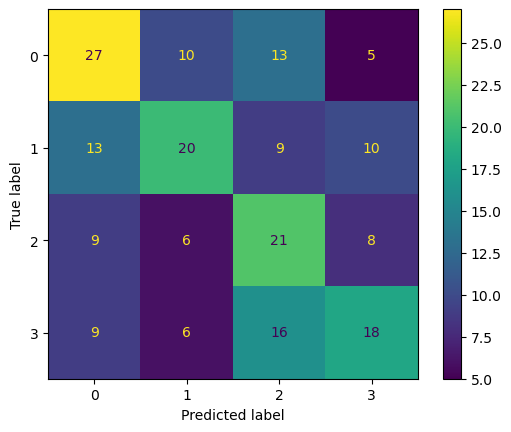

In [13]:
cm_displayCNN = ConfusionMatrixDisplay(confusion_matrix = conf_matrixCNN)
cm_displayCNN.plot()
plt.show() 

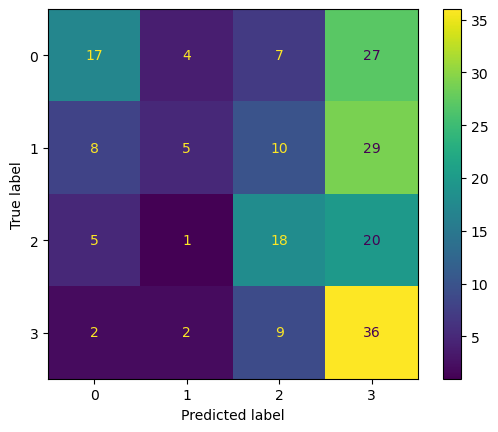

In [14]:
cm_displayMLP = ConfusionMatrixDisplay(confusion_matrix = conf_matrixMLP)
cm_displayMLP.plot()
plt.show() 

In [15]:
def tablo(confusion_matrix, index):
    TP=confusion_matrix[index][index]
    FN=sum(confusion_matrix[index][:index])+sum(confusion_matrix[index][index+1:])
    FP=sum(np.transpose(confusion_matrix)[index][:index])+sum(np.transpose(confusion_matrix)[index][index+1:])
    TN=sum(sum(confusion_matrix))-TP-FN-FP
    return TP,TN,FP,FN

In [16]:
def acc(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    acc = (TN+TP)/(TN+TP+FP+FN)
    return acc

In [17]:
def precision(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    p = (TP)/(TP+FP)
    return p

In [18]:
def sensitivity(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    sn = (TP)/(TP+FN)
    return sn

In [19]:
def specificity(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    sp = (TN)/(TN+FP)
    return sp

In [20]:
def f_score(confusion_matrix,index):
    p=precision(confusion_matrix,index)
    sn=sensitivity(confusion_matrix,index)
    f_score = ((p*sn)/(p+sn))*2
    return f_score

In [21]:
def recall(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    recall = TP/(TP+FN)
    return recall

In [22]:
for i in range(4):
    print(f"\n{i} acc:", acc(conf_matrixCNN,i))
    print(f"{i} precision:", precision(conf_matrixCNN,i))
    print(f"{i} sensitivity:", sensitivity(conf_matrixCNN,i))
    print(f"{i} specificity:", specificity(conf_matrixCNN,i))
    print(f"{i} f_score:", precision(conf_matrixCNN,i))
    print(f"{i} recall:", recall(conf_matrixCNN,i))


0 acc: 0.705
0 precision: 0.46551724137931033
0 sensitivity: 0.4909090909090909
0 specificity: 0.7862068965517242
0 f_score: 0.46551724137931033
0 recall: 0.4909090909090909

1 acc: 0.73
1 precision: 0.47619047619047616
1 sensitivity: 0.38461538461538464
1 specificity: 0.8513513513513513
1 f_score: 0.47619047619047616
1 recall: 0.38461538461538464

2 acc: 0.695
2 precision: 0.3559322033898305
2 sensitivity: 0.4772727272727273
2 specificity: 0.7564102564102564
2 f_score: 0.3559322033898305
2 recall: 0.4772727272727273

3 acc: 0.73
3 precision: 0.43902439024390244
3 sensitivity: 0.3673469387755102
3 specificity: 0.847682119205298
3 f_score: 0.43902439024390244
3 recall: 0.3673469387755102


In [23]:
print(classification_report(test_labels, y_pred_classesCNN))

              precision    recall  f1-score   support

           0       0.47      0.49      0.48        55
           1       0.48      0.38      0.43        52
           2       0.36      0.48      0.41        44
           3       0.44      0.37      0.40        49

    accuracy                           0.43       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.44      0.43      0.43       200



In [24]:
num_splits = 3
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

def create_model():
    model = models.Sequential([
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(4,activation='softmax')
    ])
    return model

fold_number = 1
for train_index, test_index in skf.split(train_images, train_labels):
    X_train, X_test = train_images[train_index], train_images[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    model = create_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"Training for Fold {fold_number}...")
    model.fit(X_train, y_train, epochs=5, verbose=2)

    print(f"Evaluating for Fold {fold_number}...")
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Fold {fold_number} - Loss: {loss}, Accuracy: {accuracy}")

    fold_number += 1

Training for Fold 1...
Epoch 1/5
17/17 - 2s - loss: 2.6001 - accuracy: 0.2383 - 2s/epoch - 141ms/step
Epoch 2/5
17/17 - 2s - loss: 1.3825 - accuracy: 0.2946 - 2s/epoch - 116ms/step
Epoch 3/5
17/17 - 2s - loss: 1.3316 - accuracy: 0.3846 - 2s/epoch - 117ms/step
Epoch 4/5
17/17 - 2s - loss: 1.1316 - accuracy: 0.5460 - 2s/epoch - 116ms/step
Epoch 5/5
17/17 - 2s - loss: 0.8386 - accuracy: 0.6979 - 2s/epoch - 117ms/step
Evaluating for Fold 1...
9/9 - 0s - loss: 1.3051 - accuracy: 0.4082 - 318ms/epoch - 35ms/step
Fold 1 - Loss: 1.3050906658172607, Accuracy: 0.4082396924495697
Training for Fold 2...
Epoch 1/5
17/17 - 2s - loss: 2.3173 - accuracy: 0.2364 - 2s/epoch - 137ms/step
Epoch 2/5
17/17 - 2s - loss: 1.3807 - accuracy: 0.2720 - 2s/epoch - 117ms/step
Epoch 3/5
17/17 - 2s - loss: 1.3204 - accuracy: 0.3677 - 2s/epoch - 115ms/step
Epoch 4/5
17/17 - 2s - loss: 1.1978 - accuracy: 0.4578 - 2s/epoch - 114ms/step
Epoch 5/5
17/17 - 2s - loss: 0.9358 - accuracy: 0.6398 - 2s/epoch - 117ms/step
Evalua